<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/7_AdvancedConcepts/experiments/CIFAR10_Image_Classification_1DC_1DSC_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
!pip install git+https://github.com/albumentations-team/albumentations.git
!pip install torchsummary

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-kf9_1lb7
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-kf9_1lb7
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98151 sha256=9feb005c4f636b3a50983df3d69358d7d9087d96ad601013c376d308bd16ae4d
  Stored in directory: /tmp/pip-ephem-wheel-cache-a8zp2rc3/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations


In [ ]:
from __future__ import print_function
BASE_DIR='/content/drive/MyDrive/cifar10'
%cd $BASE_DIR
from utils import plot_metrics,train,test,helper
from model import model
import torch
from pprint import pprint

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt



from dataloader.load_data import Cifar10DataLoader
from utils.engine import TriggerEngine

/content/drive/MyDrive/cifar10


## Load config file

In [ ]:
config = helper.process_config("./config/cifar_config.yaml")
use_cuda = torch.cuda.is_available()
helper.set_seed(config['seed'],use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")

pprint(config)

 loading Configuration of your experiment ..
{'arch': {'args': {'dropout': 0.01}, 'type': 'CIFAR10'},
 'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'args': {'cutout_prob': 0.5,
                                'horizontalflip_prob': 0.2,
                                'num_holes': 1,
                                'rotate': 20,
                                'rotate_limit': 15,
                                'scale_limit': 0.05,
                                'shift_limit': 0.05,
                                'shiftscalerotate_prob': 0.25,
                                'verticalflip_prob': 0.1},
                       'type': 'albumentation'},
 'data_loader': {'args': {'batch_size': 256,
                          'num_workers': 2,
                          'pin_memory': True},
                 'type': 'CIFAR10DataLoader'},
 'experiment_name': 'cifar10_advanced_convolution',
 'model_dir': './models/',
 'optimizer': {'args': {'lr': 0.015}, 'type': 'optim.Adam'},
 'seed

## Download data and view sample images

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


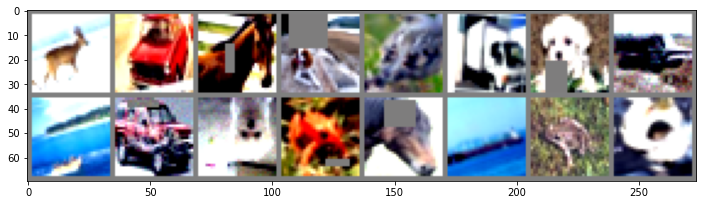

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision 

# functions to show an image
cifar_dataset=Cifar10DataLoader(config)
fig, ax = plt.subplots(figsize=(12, 12))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(cifar_dataset.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:16]))



## Trigger training

In [ ]:
exp_metrics={}
experiment_name=config['experiment_name']

trigger_training=TriggerEngine(config)

# trigger_training.
(exp_metrics[experiment_name]),model = trigger_training.run_experiment()
trigger_training.save_experiment(model,experiment_name)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 1:


Loss=1.4937444925308228 Batch_id=195 LR=0.00 Accuracy=38.38: 100%|██████████| 196/196 [00:15<00:00, 12.79it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 5177/10000 (51.77%)

Epoch 2:


Loss=1.4232556819915771 Batch_id=195 LR=0.00 Accuracy=52.56: 100%|██████████| 196/196 [00:15<00:00, 12.76it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 6113/10000 (61.13%)

Epoch 3:


Loss=1.2545454502105713 Batch_id=195 LR=0.00 Accuracy=58.02: 100%|██████████| 196/196 [00:15<00:00, 12.85it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6449/10000 (64.49%)

Epoch 4:


Loss=1.178966760635376 Batch_id=195 LR=0.00 Accuracy=61.65: 100%|██████████| 196/196 [00:15<00:00, 12.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6609/10000 (66.09%)

Epoch 5:


Loss=0.9754649996757507 Batch_id=195 LR=0.00 Accuracy=62.78: 100%|██████████| 196/196 [00:15<00:00, 12.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6703/10000 (67.03%)

Epoch 6:


Loss=1.0040533542633057 Batch_id=195 LR=0.01 Accuracy=64.94: 100%|██████████| 196/196 [00:15<00:00, 12.79it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6842/10000 (68.42%)

Epoch 7:


Loss=0.9452322721481323 Batch_id=195 LR=0.01 Accuracy=65.55: 100%|██████████| 196/196 [00:15<00:00, 12.94it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7148/10000 (71.48%)

Epoch 8:


Loss=1.0718551874160767 Batch_id=195 LR=0.01 Accuracy=66.43: 100%|██████████| 196/196 [00:15<00:00, 12.88it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6908/10000 (69.08%)

Epoch 9:


Loss=0.8629060983657837 Batch_id=195 LR=0.01 Accuracy=67.25: 100%|██████████| 196/196 [00:15<00:00, 12.95it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7231/10000 (72.31%)

Epoch 10:


Loss=0.9552897214889526 Batch_id=195 LR=0.01 Accuracy=67.70: 100%|██████████| 196/196 [00:15<00:00, 12.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 6992/10000 (69.92%)

Epoch 11:


Loss=1.0303008556365967 Batch_id=195 LR=0.01 Accuracy=67.85: 100%|██████████| 196/196 [00:15<00:00, 12.86it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7280/10000 (72.80%)

Epoch 12:


Loss=0.949060320854187 Batch_id=195 LR=0.01 Accuracy=68.58: 100%|██████████| 196/196 [00:15<00:00, 12.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7240/10000 (72.40%)

Epoch 13:


Loss=1.02222740650177 Batch_id=195 LR=0.01 Accuracy=68.73: 100%|██████████| 196/196 [00:15<00:00, 12.88it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6979/10000 (69.79%)

Epoch 14:


Loss=0.9554347991943359 Batch_id=195 LR=0.01 Accuracy=68.99: 100%|██████████| 196/196 [00:15<00:00, 12.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6764/10000 (67.64%)

Epoch 15:


Loss=0.933458685874939 Batch_id=195 LR=0.01 Accuracy=69.03: 100%|██████████| 196/196 [00:15<00:00, 12.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7227/10000 (72.27%)

Epoch 16:


Loss=1.0247514247894287 Batch_id=195 LR=0.01 Accuracy=69.32: 100%|██████████| 196/196 [00:15<00:00, 12.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7095/10000 (70.95%)

Epoch 17:


Loss=0.7686336040496826 Batch_id=195 LR=0.01 Accuracy=69.63: 100%|██████████| 196/196 [00:15<00:00, 12.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6684/10000 (66.84%)

Epoch 18:


Loss=1.004506230354309 Batch_id=195 LR=0.01 Accuracy=70.12: 100%|██████████| 196/196 [00:15<00:00, 12.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7418/10000 (74.18%)

Epoch 19:


Loss=0.6567897796630859 Batch_id=195 LR=0.01 Accuracy=70.10: 100%|██████████| 196/196 [00:15<00:00, 12.78it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7178/10000 (71.78%)

Epoch 20:


Loss=0.7453984022140503 Batch_id=195 LR=0.01 Accuracy=70.27: 100%|██████████| 196/196 [00:15<00:00, 12.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7246/10000 (72.46%)

Epoch 21:


Loss=1.0247585773468018 Batch_id=195 LR=0.01 Accuracy=70.17: 100%|██████████| 196/196 [00:15<00:00, 12.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7288/10000 (72.88%)

Epoch 22:


Loss=0.9031897783279419 Batch_id=195 LR=0.01 Accuracy=70.25: 100%|██████████| 196/196 [00:15<00:00, 12.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7213/10000 (72.13%)

Epoch 23:


Loss=0.9496216773986816 Batch_id=195 LR=0.01 Accuracy=70.74: 100%|██████████| 196/196 [00:15<00:00, 12.90it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7091/10000 (70.91%)

Epoch 24:


Loss=0.644614577293396 Batch_id=195 LR=0.01 Accuracy=70.79: 100%|██████████| 196/196 [00:15<00:00, 12.78it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7539/10000 (75.39%)

Epoch 25:


Loss=0.5876305103302002 Batch_id=195 LR=0.01 Accuracy=70.69: 100%|██████████| 196/196 [00:15<00:00, 12.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7541/10000 (75.41%)

Epoch 26:


Loss=0.5695473551750183 Batch_id=195 LR=0.01 Accuracy=71.14: 100%|██████████| 196/196 [00:15<00:00, 12.74it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7527/10000 (75.27%)

Epoch 27:


Loss=0.8274927139282227 Batch_id=195 LR=0.01 Accuracy=71.46: 100%|██████████| 196/196 [00:15<00:00, 12.83it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7556/10000 (75.56%)

Epoch 28:


Loss=0.7400002479553223 Batch_id=195 LR=0.01 Accuracy=71.83: 100%|██████████| 196/196 [00:15<00:00, 12.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7368/10000 (73.68%)

Epoch 29:


Loss=0.6830539703369141 Batch_id=195 LR=0.01 Accuracy=72.19: 100%|██████████| 196/196 [00:15<00:00, 12.90it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7582/10000 (75.82%)

Epoch 30:


Loss=0.6474740505218506 Batch_id=195 LR=0.01 Accuracy=72.13: 100%|██████████| 196/196 [00:15<00:00, 12.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7618/10000 (76.18%)

Epoch 31:


Loss=0.827487587928772 Batch_id=195 LR=0.01 Accuracy=72.96: 100%|██████████| 196/196 [00:15<00:00, 12.86it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7668/10000 (76.68%)

Epoch 32:


Loss=0.9660454988479614 Batch_id=195 LR=0.01 Accuracy=73.15: 100%|██████████| 196/196 [00:15<00:00, 12.97it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7745/10000 (77.45%)

Epoch 33:


Loss=0.8146029710769653 Batch_id=195 LR=0.01 Accuracy=73.90: 100%|██████████| 196/196 [00:15<00:00, 12.85it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7866/10000 (78.66%)

Epoch 34:


Loss=0.8319446444511414 Batch_id=195 LR=0.01 Accuracy=74.43: 100%|██████████| 196/196 [00:15<00:00, 12.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7885/10000 (78.85%)

Epoch 35:


Loss=0.6685912609100342 Batch_id=195 LR=0.01 Accuracy=75.00: 100%|██████████| 196/196 [00:15<00:00, 12.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 7988/10000 (79.88%)

Epoch 36:


Loss=0.5711635947227478 Batch_id=195 LR=0.01 Accuracy=75.63: 100%|██████████| 196/196 [00:15<00:00, 12.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8018/10000 (80.18%)

Epoch 37:


Loss=0.775741696357727 Batch_id=195 LR=0.00 Accuracy=76.10: 100%|██████████| 196/196 [00:15<00:00, 12.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8101/10000 (81.01%)

Epoch 38:


Loss=0.4276764392852783 Batch_id=195 LR=0.00 Accuracy=76.84: 100%|██████████| 196/196 [00:15<00:00, 12.83it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8111/10000 (81.11%)

Epoch 39:


Loss=0.6061345338821411 Batch_id=195 LR=0.00 Accuracy=77.41: 100%|██████████| 196/196 [00:15<00:00, 12.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8030/10000 (80.30%)

Epoch 40:


Loss=0.5574086308479309 Batch_id=195 LR=0.00 Accuracy=78.31: 100%|██████████| 196/196 [00:15<00:00, 12.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8201/10000 (82.01%)

Epoch 41:


Loss=0.4958561062812805 Batch_id=195 LR=0.00 Accuracy=79.05: 100%|██████████| 196/196 [00:15<00:00, 12.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8281/10000 (82.81%)

Epoch 42:


Loss=0.6980841159820557 Batch_id=195 LR=0.00 Accuracy=79.73: 100%|██████████| 196/196 [00:15<00:00, 12.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8301/10000 (83.01%)

Epoch 43:


Loss=0.4978563189506531 Batch_id=195 LR=0.00 Accuracy=80.40: 100%|██████████| 196/196 [00:15<00:00, 12.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8375/10000 (83.75%)

Epoch 44:


Loss=0.6170355081558228 Batch_id=195 LR=0.00 Accuracy=80.82: 100%|██████████| 196/196 [00:15<00:00, 12.84it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8436/10000 (84.36%)

Epoch 45:


Loss=0.6192164421081543 Batch_id=195 LR=0.00 Accuracy=81.26: 100%|██████████| 196/196 [00:15<00:00, 12.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8427/10000 (84.27%)

Epoch 46:


Loss=0.7145143151283264 Batch_id=195 LR=0.00 Accuracy=82.13: 100%|██████████| 196/196 [00:15<00:00, 12.76it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8469/10000 (84.69%)

Epoch 47:


Loss=0.5419425368309021 Batch_id=195 LR=0.00 Accuracy=82.72: 100%|██████████| 196/196 [00:15<00:00, 12.74it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8493/10000 (84.93%)

Epoch 48:


Loss=0.5434927344322205 Batch_id=195 LR=0.00 Accuracy=82.61: 100%|██████████| 196/196 [00:15<00:00, 12.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8504/10000 (85.04%)

Epoch 49:


Loss=0.6249035000801086 Batch_id=195 LR=0.00 Accuracy=82.95: 100%|██████████| 196/196 [00:15<00:00, 12.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8501/10000 (85.01%)

Epoch 50:


Loss=0.4975409507751465 Batch_id=195 LR=0.00 Accuracy=82.66: 100%|██████████| 196/196 [00:15<00:00, 12.80it/s]



Test set: Average loss: 0.0018, Accuracy: 8504/10000 (85.04%)

Saving the model for cifar10_advanced_convolution


## Model summary

In [ ]:
trigger_training.model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
         Dropout2d-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
              ReLU-6          [-1, 128, 32, 32]               0
       BatchNorm2d-7          [-1, 128, 32, 32]             256
         Dropout2d-8          [-1, 128, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]           4,128
             ReLU-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           9,216
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
        Dropout2d-14           [-1, 32,

## Missclassification

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Total wrong predictions are 1496


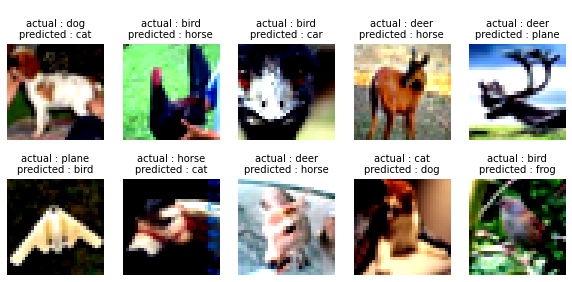

In [ ]:
model = torch.load(f'./saved_models/{experiment_name}.pt')
model.eval()
trigger_training.wrong_predictions(model)

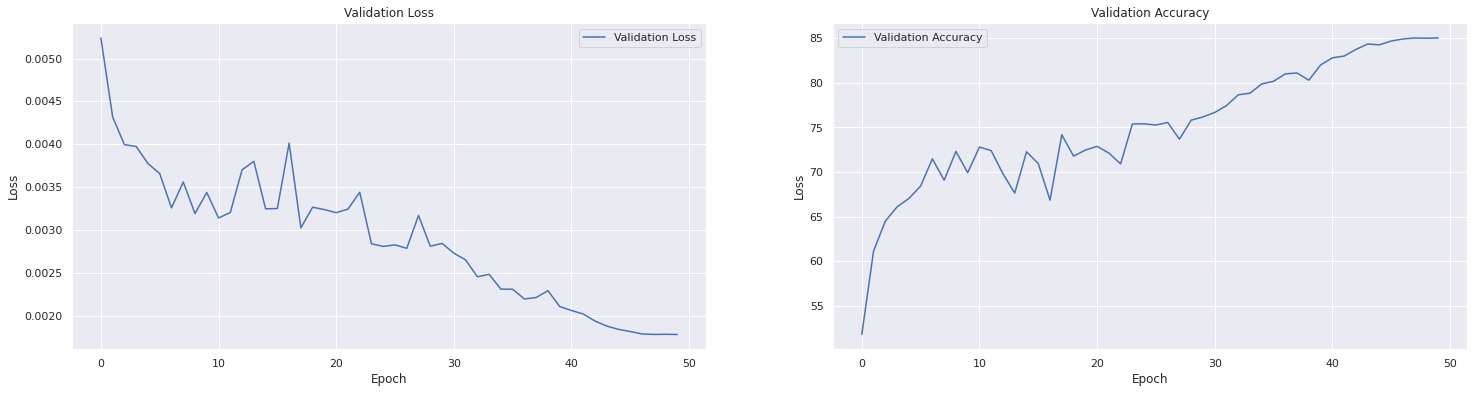

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (25,6)
train_accuracy,train_losses,test_accuracy,test_losses  = exp_metrics[experiment_name]

# Plot the learning curve.
fig, (ax1,ax2) = plt.subplots(1,2)
# ax1.plot(np.array(train_losses), 'r', label="Training Loss")
ax1.plot(np.array(test_losses), 'b', label="Validation Loss")

# Label the plot.
ax1.set_title("Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

# ax2.plot(np.array(train_accuracy), 'r', label="Training Accuracy")
ax2.plot(np.array(test_accuracy), 'b', label="Validation Accuracy")

# Label the plot.
ax2.set_title("Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()

plt.show()